# Deep Learning

### Applications
* Computer vision is a major application (e.g., self-driving cars)
* Robotics
* Chatbots
* Search engines
* Facial recognition
* Speech recognition
* Language translation
* Predicting election results


## Keras and TensorFlow
* Deep Learning models require more sophisticated setup
  * Need to connect **layers**
  * Needs big data
* `Keras` package provides interface to Google's `TensorFlow`
* `Keras` encapsulates the mathematics (blackbox)

See: https://www.youtube.com/watch?v=J6Ok8p463C4


# Neural Networks

* Composed of 'neurons' and connected through 'synapse'
  * Connections reinforced during learning (Hebbian)
* Nets trained iteratively
  * An iteration is known as an **epoch**
  * Training attempts to minimize a **loss function**

> **Backpropagation** - The network determines the amount that each neuron contributes to the overall loss, then goes back the layers and adjusts the weights in efforts to minimize the loss.  

# Tensors

Multidimensional arrays

* Matrices are 2D
* Videos are stored in a tensor.  Information includes:
  * 30 frames/second - (1 frame = X x Y pixel)
  * 3 colors (RGB)

100 x 100 x 3 x 30 = 4D Tensor

## BIG DATA
This big data and needs (hardware accelerators) GPU/TPU and low precision number representation.

* 600 hours of video uploaded to YouTube per minute.
* Training models needs done fast and efficient

### Performance and Energy-efficiency

# Convolutional Neural Network (CNN)
* Image classification
* Natural speech recognition
* Recommender systems

__Probabilitic classification__



$$
y = \sigma(Wx + b)
$$

where $x$ is the input vector (layer), $W$ is the weight tensor, and $b$ the "bias". The function $\sigma$ is called the **activation** function and could be a sigmoid or ReLU (Rectificed Linear Unit). ReLU(x) = max(0,x).  *The* vector $y$ could be the output layer or one of the hidden layers.

In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
# from tensorflow.keras.datasets import mnist
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Import libraries 
import numpy as np # need mean and std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


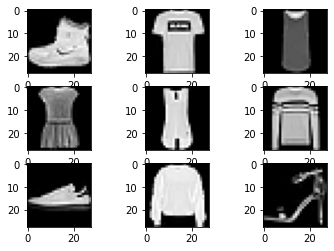

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# summarize loaded dataset
print(f'Train: X={trainX.shape}, y={trainy.shape}')
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# look at a few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	
  # plot pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

# Data Prep for Keras

Keras CNNs require numPy arrays as inputs

In [ ]:
#' -----------------------------------------------------------------------------
#' Deep Learning: Convolutional Neural Networks (CNN)
#' Functions
#' : Data prep - split and normalize data; convert to categorical
#' : Build model - create cnn with multiple layers
#' : Check model performance
#' : Visualize neural network
#' : View summary of model predictions
#'
#' Quinlan, J.
#' -----------------------------------------------------------------------------

def data_prep(xtrain, xtest, ytrain, ytest):
  # Int2float
  X_train = xtrain.astype('float32')/255.0
  X_test = xtest.astype('float32')/255.0
  
  # one hot encode target values
  y_train = to_categorical(ytrain)
  y_test = to_categorical(ytest)
  
  return X_train, X_test, y_train, y_test
  # ----------------------------------------------------------------------------



def model_performance(scores):
  # '''Summarize model performance'''

	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' 
       % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	
  # box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
  # ----------------------------------------------------------------------------


def define_model():
  # Instantiate Object
	cnn = Sequential()
 
  # Add Layers
	cnn.add(Conv2D(32, (3, 3), 
                activation='relu', 
                kernel_initializer='he_uniform', 
                input_shape=(28, 28, 1)))
	cnn.add(MaxPooling2D((2, 2)))  # downsamples (takes max element)
	cnn.add(Flatten())             # flatten to 1D array

  # Add dense layer to reduce number of features
	cnn.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 
  # Add dense layer to convert remaining values info classification probabilities
	cnn.add(Dense(10, activation='softmax'))
 
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)  # compare with 'adam'
	cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return cnn
  # ----------------------------------------------------------------------------



# viz model
def viz_model(cnn):
  from tensorflow.keras.utils import plot_model
  plot_model(cnn, to_file='cnn.png', show_shapes=True, show_layer_names=True)
  # ----------------------------------------------------------------------------

In [ ]:
# Driver

# Get Data
# X_train, X_test, y_train, y_test = data_prep(trainX, testX, trainy, testy)

# Make Model
cnn = define_model()

# Fit model
history = cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
predictions[4]

array([8.7592490e-02, 1.1099278e-08, 3.7841795e-03, 2.4310997e-05,
       7.8109169e-04, 3.2437157e-07, 9.0781343e-01, 1.2326042e-07,
       1.2105279e-08, 3.9575002e-06], dtype=float32)

In [ ]:
np.argmax(predictions[4])

6

In [ ]:
np.argmax(y_test[4])

6

In [ ]:
viz_model(cnn)

In [ ]:
# evaluate model
results = cnn.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.3265 - accuracy: 0.9147


AttributeError: ignored

---

# Recurrent Neural Networks (RNNs)

* Instead of stacked layers applied sequentially (i.e., the use of `from tensorflow.keras.models import Sequential`), here we use a non-sequential model.

* RNN contain loop layers where the output of one layer is the input to the same layer at the next time step (next word in a sentence = word sequence).

* RNNs take into account the relationships among earlier and later parts of the sequence (i.e., of words, e.g., good vs. not good).

* RNNs used to:
  - predict next word to type
  - question responses
  - sentiment analysis (binary classification + or -)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

### Load 10000 words from 88,000 total using imdb's `load_data` function

Keep in mind, more words will produce better models, but neural nets are 
computationally expensive (takes a lot of time and electrical energy, therefore
also environmentally unfriendly)



In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


## Data Exploration

In [ ]:
X_train.shape

(25000,)

In [ ]:
len(X_train[123])     # Words in review

56

In [ ]:
X_train[123]

In [ ]:
y_train.shape

(25000,)

In [ ]:
y_train[123]         # Positive or negative review

1

In [ ]:
for i in range(10):
  print('Positive' if y_train[i]==1 else 'Negative')

Positive
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Positive
Negative


In [ ]:
# rewrite [9] as a comprehension instead of explicit for loop


## Decode a review

In [ ]:
# Get dictionary containing word to index
word2index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
# get index (ordered by frequency) of 'great'
word2index['bad'] 

75

In [ ]:
# Dictionary Comprehension 
idx2word = {i:w for (w,i) in word2index.items()}

In [ ]:
idx2word[84]

'great'

In [ ]:
idx2word.get(6)

'is'

In [ ]:
# Top 50 words
[idx2word[i] for i in range(1,51)]

In [ ]:
idx2word[6]

In [ ]:
' '.join([idx2word.get(i-3,'?') for i in X_train[31]])

"? a strong woman oriented subject after long director ? ? ? the power the ? version of the hollywood hit not without my daughter is actress ? first home production a story about a woman's fight against harsh injustice br br the story of the film revolves around ? ? kapoor who lives in canada with her two ? ? ? ? ? there she meets ? ? kapoor falls in love with him and they soon marry their family is complete when ? has a boy ? master ? ? but their happiness is short lived as the news of ? ? mother ? naval makes them leave their perfect life in canada and come to india and that's when the problems start from the moment they reach br br india both are shocked to see the ? and the vast ? of people everywhere they take a crowded train to reach ? village and when they finally reach the station they have to catch a long bus drive to his village the filthy ? bus combined with the uncertain ? makes it a never ending drive and unfortunately for them a ? mob that beat ? out of shape for no fault

In [ ]:
y_train[31]

1

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(X_train,maxlen = 200)   # 200 words per review
X_test = pad_sequences(X_test, maxlen = 200)

In [ ]:
X_train.shape

(25000, 200)

## Split Test data into Validation and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, random_state=123, test_size=0.20)

In [ ]:
X_val.shape

(5000, 200)

In [ ]:
X_test.shape

(20000, 200)

# Create the network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding

rnn = Sequential()

## Add layers

In [ ]:
rnn.add(Embedding(input_dim=10000,output_dim=128, input_length=200))
rnn.add(LSTM(units = 128, dropout=0.2, recurrent_dropout = 0.2)) # units =num of neurons per layer
rnn.add(Dense(units=1,activation='sigmoid')) # sigmoid preferred for binary classification



## Compile Model

In [ ]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train model

In [ ]:
rnn.fit(X_train, y_train, epochs=10, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/10
782/782 [==============================] - 514s 653ms/step - loss: 0.4522 - accuracy: 0.7892 - val_loss: 0.3595 - val_accuracy: 0.8588
Epoch 2/10
782/782 [==============================] - 505s 646ms/step - loss: 0.2774 - accuracy: 0.8894 - val_loss: 0.3364 - val_accuracy: 0.8508
Epoch 3/10
743/782 [===========================>..] - ETA: 24s - loss: 0.1947 - accuracy: 0.9273

KeyboardInterrupt: ignored

## Evaluate Model

In [ ]:
results = rnn.evaluate(X_test,y_test)

---

# Summary

1. Import Libraries (for example)
```python
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
```

2. Load (split) data
3. Prep data (if needed)
4. Create model and add layers
```python
cnn.Sequential()
cnn.add(...) # hidden layer (e.g., convolution)
cnn.add(...) # hidden layer (e.g., softmax)
```
5. Compile model
```python
cnn.compile(...)
```
6. Train (fit) model
```python
cnn.fit(...)
```
7. Test model (predict with test set)
```python
cnn.predict(...)
```

8. Overal evaluation of model
```python
cnn.evaluate(...)
```

---

# PyTorch

Web resources: 
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://github.com/pytorch/examples

https://lirnli.wordpress.com/2017/09/01/simple-pytorch-rnn-examples/


In [ ]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np



In [ ]:
# Which versions?
import sys
print(sys.version)
print(T.__version__)

3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
1.10.0+cu111


In [ ]:
# if __name__ == "__main__":
#  main()

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
atensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device=device, requires_grad=True)

print(atensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)


In [ ]:
print(atensor.dtype)
print(atensor.device)
print(atensor.shape)
print(atensor.requires_grad)

torch.float32
cpu


In [ ]:
x = torch.empty(size= (3,3))  # 3 x 3 matrix
y = torch.zeros(3,3)
z = torch.rand(3,3)
u = torch.ones(3,3)
w = torch.eye(5,5)
d = torch.diag(z)

In [ ]:
v = torch.linspace(0,1,100)
p = torch.arange(start=0,end=1,step=0.1)
q = torch.empty(size=(1,5)).normal_(mean=0, std=1)
r = torch.empty(size=(1,5)).uniform_(0, 1)

In [ ]:
print(q)

tensor([[ 0.7483,  0.0560, -0.0652, -0.8513,  0.1249]])


## Convert tensor to different types


In [ ]:
another = z.bool()
print(another)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [ ]:
print(z.short())
print(z.half())
print(z.float())
print(z.double())

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)
tensor([[0.9082, 0.3950, 0.9106],
        [0.6519, 0.9648, 0.5498],
        [0.1377, 0.2578, 0.1246]], dtype=torch.float16)
tensor([[0.9081, 0.3950, 0.9109],
        [0.6520, 0.9646, 0.5496],
        [0.1376, 0.2579, 0.1246]])
tensor([[0.9081, 0.3950, 0.9109],
        [0.6520, 0.9646, 0.5496],
        [0.1376, 0.2579, 0.1246]], dtype=torch.float64)


In [ ]:
import numpy as np
np_array = np.zeros((5,5))
tensor = torch.from_numpy(np_array)

## Tensor Math

In [ ]:
x = torch.tensor([1,2,3])
y = torch.tensor([4,5,6])
z = x + y

print(z)

tensor([5, 7, 9])


In [ ]:
z = x - y

In [ ]:
z = torch.true_divide(x,y)

In [ ]:
t = torch.zeros(3)
t += x

In [ ]:
z = x.pow(2)
z = x**2      # same

In [ ]:
z = x > 0
print(z)

tensor([True, True, True])


In [ ]:
x = torch.rand((3,5))
y = torch.rand((5,4))

print(x.mm(y))

tensor([[1.4889, 0.8691, 0.7685, 1.3351],
        [1.6834, 0.8677, 1.0360, 1.5700],
        [0.8842, 0.2591, 0.6381, 0.8287]])
